In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score 
from urllib.request import urlopen

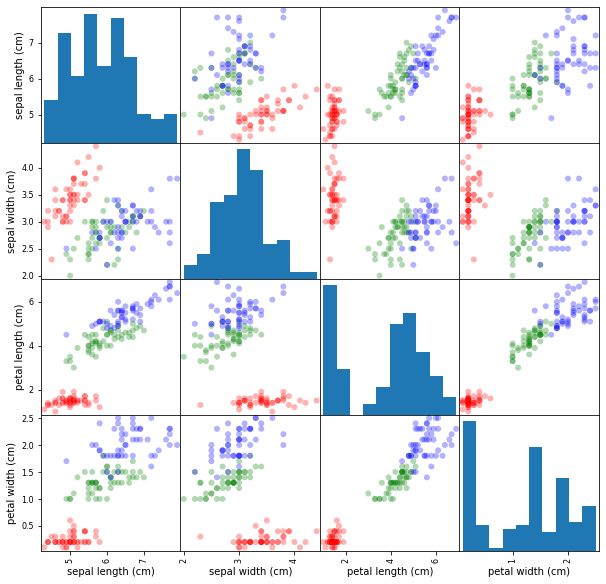

In [12]:
# Zadanie 1: Wczytaj dane Iris
iris = datasets.load_iris()
# print(iris.DESCR) # opis danych
# print(iris.data)  # features, cechy
# print(type(iris.data)) # tablica NumPy ndarray
# print(iris.data.shape) # rozmiar tablicy zwraca tuple
# print(iris.feature_names) # lista nazw dla iris.data
# print(iris.target)  # zmienna celu (target)
# print(iris.target.dtype) # tablica NumPy
# print(iris.target.shape) # rozmiary tablicy celu
colors = []
palette = {0:"red", 1:"green", 2:"blue"}
for c in np.nditer(iris.target):
    colors.append(palette[int(c)])
df = pd.DataFrame(iris.data, columns=iris.feature_names)
sc = pd.plotting.scatter_matrix(df, alpha=0.3, figsize=(10,10), diagonal="hist", color=colors, marker="o", grid="True")

In [13]:
# Dane z witryn internetowych - format LIBSVM
target_page = 'http://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/a1a'
result = urlopen(target_page)
from sklearn.datasets import load_svmlight_file
X, y = load_svmlight_file(result)
print(X.shape, y.shape)

URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1056)>

In [15]:
# Zadanie 2: Zapisz plik iris i wczytaj go do ramki danych
nazwy  =['sepal_length','sepal_width','petal_length','petal_width','target']

iris_filename = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
iris = pd.read_csv(iris_filename, sep=',', decimal='.', header=None, names=nazwy)

print(type(iris))
print(iris)

<class 'pandas.core.frame.DataFrame'>
     sepal_length  sepal_width  petal_length  petal_width          target
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
5             5.4          3.9           1.7          0.4     Iris-setosa
6             4.6          3.4           1.4          0.3     Iris-setosa
7             5.0          3.4           1.5          0.2     Iris-setosa
8             4.4          2.9           1.4          0.2     Iris-setosa
9             4.9          3.1           1.5          0.1     Iris-setosa
10            5.4          3.7           1.5          0.2     Iris-setosa
11            4.8          3.4           1.6          0.2     Iris-setosa


In [16]:
# Zadanie 2 part 2: Zamiana z DataFrame na listy
lista_column = ['sepal_length','sepal_width','petal_length','petal_width']

iris2 = iris[lista_column]
iris_data = iris2.values

iris_target, iris_target_name = pd.factorize(iris['target'])
print(iris_data.shape)
print(iris_target.shape)

(150, 4)
(150,)


In [17]:
# Generowanie danych sztucznych
X,y = datasets.make_classification(n_samples=10**6, n_features = 10, random_state=1234)
print(X.shape, y.shape)

(1000000, 10) (1000000,)


In [18]:
# Pliki Excela
xls = pd.ExcelFile('Excel_Sample.xlsx')
slownik = xls.sheet_names
print(slownik)
example = pd.read_excel(xls, sheet_name=slownik[2], na_values='n/a')
example.info()

['Sheet1', 'testwy', 'testowy2']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
Unnamed: 0    5 non-null int64
a             5 non-null int64
b             5 non-null int64
c             4 non-null float64
d             5 non-null int64
dtypes: float64(1), int64(4)
memory usage: 280.0 bytes


In [19]:
# Zadanie 3: Stwórz zmienną (kolumnę), która będzie przechowywać informację o długości imienia.
df = pd.read_csv("polish_names.csv")
df.info()
df.gender.value_counts()

# df.head(10)
# df.sample(10)
df['gender'].value_counts()
def transform_string_into_number(string):
    return int(string == 'm')
    
df['gender'].head().map( transform_string_into_number )
df['target'] = df['gender'].map(lambda x: int(x != 'm'))
df['len_name'] = df['name'].map(lambda x: len(x))
df.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1705 entries, 0 to 1704
Data columns (total 2 columns):
name      1705 non-null object
gender    1705 non-null object
dtypes: object(2)
memory usage: 26.7+ KB


name gender  target  len_name
960      Miłorad      m       0         7
1349     Tatiana      f       1         7
1415    Waldemar      m       0         8
337     Demetria      f       1         8
1676      Otniel      m       0         6
1197     Rozanna      f       1         7
229    Bożeciech      m       0         9
1134  Pudecjanna      f       1        10
115      Artemon      m       0         7
748      Kondrat      m       0         7

In [20]:
# Pierwszy modele

X = df[ ['len_name'] ].values
y = df['target'].values
model = DummyClassifier()
model.fit(X, y)
y_pred = model.predict(X)
print('DC',accuracy_score(y, y_pred))

X = df[ ['len_name'] ].values
y = df['target'].values
model = LogisticRegression()
model.fit(X, y)
y_pred = model.predict(X)
print('LR',accuracy_score(y, y_pred))

DC 0.5313782991202346
LR 0.6058651026392962


C:\Users\aroza\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
